In [208]:
#test[['PassengerId','Survived']].to_csv('Results.csv',index=False) 


In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [210]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
combine = [train, test]

In [211]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [212]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [213]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [214]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",male,347082,B96 B98,S
freq,1,577,7,4,644


In [215]:
train[['Survived','Pclass']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [216]:
train[['Survived','Age']].groupby(['Survived'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,Survived,Age
1,1,28.343690
0,0,30.626179


In [217]:
train[['Survived','Sex']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [218]:
train[['Survived','Embarked']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [219]:
train[['Survived','SibSp']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [220]:
train[['Survived','Parch']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [221]:
train[['Survived','Sex','Age']][train[['Age']].isna().any(axis=1)]


,Survived,Sex,Age
5,0,male,NaN
17,1,male,NaN
19,1,female,NaN
26,0,male,NaN
28,1,female,NaN
29,0,male,NaN
31,1,female,NaN
32,1,female,NaN
36,1,male,NaN
42,0,male,NaN


In [222]:
train[['Survived','Age','Sex']].groupby(['Survived','Sex'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,Survived,Sex,Age
2,1,female,28.847716
3,1,male,27.276022
0,0,female,25.046875
1,0,male,31.618056


In [223]:
for i in train[train.Age.isnull()].index:
    if (train.loc[i, 'Sex'] == 'female' and train.loc[i, 'Survived'] == 1):
        train.loc[i, 'Age'] = 28
    if (train.loc[i, 'Sex'] == 'male' and train.loc[i, 'Survived'] == 1):
                train.loc[i, 'Age'] = 27
    if (train.loc[i, 'Sex'] == 'female' and train.loc[i, 'Survived'] == 0):
                train.loc[i, 'Age'] = 25
    if (train.loc[i, 'Sex'] == 'male' and train.loc[i, 'Survived'] == 0):
                train.loc[i, 'Age'] = 32
train.loc[5,:]          

PassengerId                   6
Survived                      0
Pclass                        3
Name           Moran, Mr. James
Sex                        male
Age                          32
SibSp                         0
Parch                         0
Ticket                   330877
Fare                     8.4583
Cabin                       NaN
Embarked                      Q
Name: 5, dtype: object

In [224]:
title_mapping = {"female": 0, "male": 1}
for data in combine:
    data['Sex'] = data['Sex'].map(title_mapping)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [225]:
for data in combine:
    data['title'] = data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['title'], train['Sex'])

Sex,0,1
title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [226]:
for data in combine:
    data['title'] = data['title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    data['title'] = data['title'].replace('Mlle', 'Miss')
    data['title'] = data['title'].replace('Ms', 'Miss')
    data['title'] = data['title'].replace('Mme', 'Mrs')
    
train[['title', 'Survived']].groupby(['title'], as_index=False).mean()

,title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [227]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for data in combine:
    data['title'] = data['title'].map(title_mapping)
    data['title'] = data['title'].fillna(0)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,1


In [228]:
train['Embarked'] = train['Embarked'].fillna('S')

title_mapping = {"S": 0, "C": 1, "Q": 2}
for data in combine:
    data['Embarked'] = data['Embarked'].map(title_mapping)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,1


In [229]:
train['AgeBand'] = pd.cut(train['Age'], 5)

train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.344168
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [230]:
for data in combine:    
    data.loc[ data['Age'] <= 16, 'Age'] = 0
    data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age'] = 1
    data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age'] = 2
    data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age'] = 3
    data.loc[ data['Age'] > 64, 'Age']
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,AgeBand
0,1,0,3,"Braund, Mr. Owen Harris",1,1.0,1,0,A/5 21171,7.2500,NaN,0,1,"(16.336, 32.252]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2.0,1,0,PC 17599,71.2833,C85,1,3,"(32.252, 48.168]"
2,3,1,3,"Heikkinen, Miss. Laina",0,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2,"(16.336, 32.252]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2.0,1,0,113803,53.1000,C123,0,3,"(32.252, 48.168]"
4,5,0,3,"Allen, Mr. William Henry",1,2.0,0,0,373450,8.0500,NaN,0,1,"(32.252, 48.168]"


In [231]:
train = train.drop(['PassengerId','Name','Ticket','Cabin','AgeBand'],axis=1)
test = test.drop(['Name','Ticket','Cabin'],axis=1)


In [232]:
combine = [train, test]
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,0,3,1,1.0,1,0,7.2500,0,1
1,1,1,0,2.0,1,0,71.2833,1,3
2,1,3,0,1.0,0,0,7.9250,0,2
3,1,1,0,2.0,1,0,53.1000,0,3
4,0,3,1,2.0,0,0,8.0500,0,1
5,0,3,1,1.0,0,0,8.4583,2,1
6,0,1,1,3.0,0,0,51.8625,0,1
7,0,3,1,0.0,3,1,21.0750,0,4
8,1,3,0,1.0,0,2,11.1333,0,3
9,1,2,0,0.0,1,0,30.0708,1,3


In [233]:
train['Fare'].fillna(train['Fare'].dropna().median(), inplace=True)
test['Fare'].fillna(test['Fare'].dropna().median(), inplace=True)

In [234]:
train['FareBand'] = pd.cut(train['Fare'], 4)
train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.512, 128.082]",0.368113
1,"(128.082, 256.165]",0.724138
2,"(256.165, 384.247]",0.666667
3,"(384.247, 512.329]",1.000000


In [235]:
for data in combine:
    data.loc[data['Fare'] <= 128,'Fare'] = 0
    data.loc[( data['Fare'] > 128 ) & ( data['Fare'] <= 256 ), 'Fare' ] = 1
    data.loc[( data['Fare'] > 256 ) & ( data['Fare'] <= 384 ), 'Fare' ] = 2
    data.loc[ data['Fare'] > 384 , 'Fare']= 3
    train['Fare'] = train['Fare'].astype(int)
    
train = train.drop(['FareBand'], axis=1)

In [236]:
combine = [train, test]
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,0,3,1,1.0,1,0,0,0,1
1,1,1,0,2.0,1,0,0,1,3
2,1,3,0,1.0,0,0,0,0,2
3,1,1,0,2.0,1,0,0,0,3
4,0,3,1,2.0,0,0,0,0,1
5,0,3,1,1.0,0,0,0,2,1
6,0,1,1,3.0,0,0,0,0,1
7,0,3,1,0.0,3,1,0,0,4
8,1,3,0,1.0,0,2,0,0,3
9,1,2,0,0.0,1,0,0,1,3


In [237]:
train[['Fare', 'Survived']].groupby(['Fare'], as_index=False).mean().sort_values(by='Fare', ascending=True)

,Fare,Survived
0,0,0.368113
1,1,0.724138
2,2,0.666667
3,3,1.000000


In [238]:
for data in combine:
    data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [239]:
for data in combine:
    data['IsAlone'] = 0
    data.loc[data['FamilySize'] == 1, 'IsAlone'] = 1

train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [240]:
train = train.drop(['SibSp','Parch','FamilySize'],axis=1)
test = test.drop(['SibSp','Parch','FamilySize'],axis=1)
combine = [train,test]

In [241]:
train

,Survived,Pclass,Sex,Age,Fare,Embarked,title,IsAlone
0,0,3,1,1.0,0,0,1,0
1,1,1,0,2.0,0,1,3,0
2,1,3,0,1.0,0,0,2,1
3,1,1,0,2.0,0,0,3,0
4,0,3,1,2.0,0,0,1,1
5,0,3,1,1.0,0,2,1,1
6,0,1,1,3.0,0,0,1,1
7,0,3,1,0.0,0,0,4,0
8,1,3,0,1.0,0,0,3,0
9,1,2,0,0.0,0,1,3,0


In [242]:
for data in combine:
    data['Age*Class'] = data.Age* data.Pclass

In [243]:
train

,Survived,Pclass,Sex,Age,Fare,Embarked,title,IsAlone,Age*Class
0,0,3,1,1.0,0,0,1,0,3.0
1,1,1,0,2.0,0,1,3,0,2.0
2,1,3,0,1.0,0,0,2,1,3.0
3,1,1,0,2.0,0,0,3,0,2.0
4,0,3,1,2.0,0,0,1,1,6.0
5,0,3,1,1.0,0,2,1,1,3.0
6,0,1,1,3.0,0,0,1,1,3.0
7,0,3,1,0.0,0,0,4,0,0.0
8,1,3,0,1.0,0,0,3,0,3.0
9,1,2,0,0.0,0,1,3,0,0.0


In [37]:
from sklearn.preprocessing import normalize

In [244]:
label= train[['Survived']]
train = normalize(train.iloc[:,1:])

In [245]:
train

array([[0.65465367, 0.21821789, 0.21821789, ..., 0.21821789, 0.        ,
        0.65465367],
       [0.22941573, 0.        , 0.45883147, ..., 0.6882472 , 0.        ,
        0.45883147],
       [0.61237244, 0.        , 0.20412415, ..., 0.40824829, 0.20412415,
        0.61237244],
       ...,
       [0.62554324, 0.        , 0.20851441, ..., 0.41702883, 0.        ,
        0.62554324],
       [0.37796447, 0.37796447, 0.37796447, ..., 0.37796447, 0.37796447,
        0.37796447],
       [0.58834841, 0.19611614, 0.19611614, ..., 0.19611614, 0.19611614,
        0.58834841]])

In [246]:
pd.DataFrame(train)

,0,1,2,3,4,5,6,7
0,0.654654,0.218218,0.218218,0.000000,0.000000,0.218218,0.000000,0.654654
1,0.229416,0.000000,0.458831,0.000000,0.229416,0.688247,0.000000,0.458831
2,0.612372,0.000000,0.204124,0.000000,0.000000,0.408248,0.204124,0.612372
3,0.235702,0.000000,0.471405,0.000000,0.000000,0.707107,0.000000,0.471405
4,0.416025,0.138675,0.277350,0.000000,0.000000,0.138675,0.138675,0.832050
5,0.588348,0.196116,0.196116,0.000000,0.392232,0.196116,0.196116,0.588348
6,0.213201,0.213201,0.639602,0.000000,0.000000,0.213201,0.213201,0.639602
7,0.588348,0.196116,0.000000,0.000000,0.000000,0.784465,0.000000,0.000000
8,0.566947,0.000000,0.188982,0.000000,0.000000,0.566947,0.000000,0.566947
9,0.534522,0.000000,0.000000,0.000000,0.267261,0.801784,0.000000,0.000000


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


In [ ]:
X_train, X_test, y_train, y_test = train_test_split( train, label, test_size=0.1, random_state=42)

In [51]:
np.mean(cross_val_score(RandomForestClassifier(n_estimators=100),train,  label,cv=5))

C:\Users\muham.DESKTOP-5VIB3RA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muham.DESKTOP-5VIB3RA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muham.DESKTOP-5VIB3RA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muham.DESKTOP-5VIB3RA\Anaconda3\lib\site-packages\sklearn\model_selection

0.8069989328981231

In [247]:
random_forest = RandomForestClassifier(n_estimators=100,max_depth=10)
random_forest.fit(train, label)
random_forest.score(train, label)


C:\Users\muham.DESKTOP-5VIB3RA\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.8462401795735129

In [248]:
model = DecisionTreeClassifier(max_depth=20,min_samples_leaf=10,min_samples_split=12,max_features=2)
model.fit(train,label)
model.score(train,label)

0.8327721661054994

In [207]:
log = LogisticRegression()
log.fit(train,label)
log.score(train,label)


C:\Users\muham.DESKTOP-5VIB3RA\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7890011223344556

In [52]:
from sklearn.model_selection import learning_curve

def draw_learning_curves(X, y, estimator, num_trainings):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, num_trainings))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    print( test_scores_mean)
    plt.grid()

    plt.title("Learning Curves")
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    plt.plot(train_scores_mean, 'o-', color="g",
             label="Training score")
    plt.plot(test_scores_mean, 'o-', color="y",
             label="Cross-validation score")


    plt.legend(loc="best")

    plt.show()

C:\Users\muham.DESKTOP-5VIB3RA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muham.DESKTOP-5VIB3RA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muham.DESKTOP-5VIB3RA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muham.DESKTOP-5VIB3RA\Anaconda3\lib\site-packages\sklearn\model_selection

C:\Users\muham.DESKTOP-5VIB3RA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muham.DESKTOP-5VIB3RA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muham.DESKTOP-5VIB3RA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\muham.DESKTOP-5VIB3RA\Anaconda3\lib\site-packages\sklearn\model_selection

[0.76325403 0.78342226 0.79460172 0.80249827 0.79015755 0.79468332
 0.7935409  0.80138723 0.8036407  0.80477057]


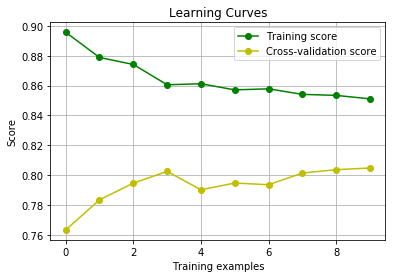

In [249]:
draw_learning_curves(train, label, random_forest, 10)